In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import pandas as pd

In [2]:
query = "iphone+13+case"
my_url = 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=iphone+13+case&_sacat=0&LH_TitleDesc=0&_odkw=ps5&_osacat=0'.format(query)
my_url

'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=iphone+13+case&_sacat=0&LH_TitleDesc=0&_odkw=ps5&_osacat=0'

In [3]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

page_soup = soup(page_html, 'html.parser')

In [4]:
divs = page_soup.findAll('div',{'class':'s-item__details clearfix'})    # Find the HTML tag with the data we are looking for and fetch all instances of it
prices = []

for case in divs: 
    price = case.find('span',{'class':"s-item__price"})
    price = price.text[1:]
    price = price.replace(',','')
    prices.append(price)


prices = pd.to_numeric(prices,errors='coerce')
prices

array([20.  ,   nan,  4.45,   nan,  4.95,   nan,   nan,   nan,   nan,
        7.74,  8.75,   nan,   nan,   nan,   nan,  8.99,   nan,   nan,
       14.98, 11.98,   nan, 12.99,   nan,   nan,   nan,   nan, 18.41,
        1.95,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
        2.94,   nan,   nan,   nan,  9.99,   nan,   nan,  8.65,   nan,
        7.99,  8.95, 13.45, 19.79,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 20.69,   nan,   nan, 12.99, 12.95,   nan,   nan,
         nan,  8.95, 21.95,   nan,   nan,   nan,   nan,  8.99, 11.95,
         nan,   nan,   nan,   nan])

Text(0, 0.5, 'Price in USD')

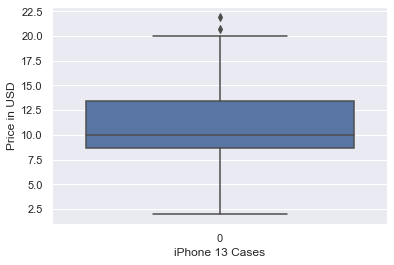

In [7]:
import seaborn as sns
sns.set()
box = sns.boxplot(data=prices)
box.set_xlabel("iPhone 13 Cases")
box.set_ylabel("Price in USD")

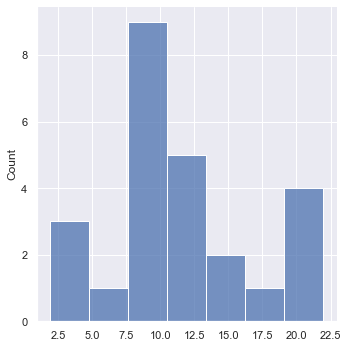

In [6]:
hist = sns.displot(data=prices)